In [2]:
import numpy as np
from numpy import pi
from scipy import signal

# Assigning grid points

Nx = 100
Ny = 100
Nt = 100

x = np.linspace(-Nx, Nx, 100)
y = np.linspace(-Ny, Ny, 100)
t = np.linspace(0, Nt-1, 100)

# Equation to solve
# phi(x,y,t) = ∫∫∫ G(x,y,t; x',y',t') . Source(x',y',t') dx' dy' dt'
# G(x,y,t; x',y',t') = Green's Function

# phi = displacement by the wave
phi = np.zeros((Nt,Ny,Nx))


# Define Function to realize Green's Function for Wave Equation
def gw(xx, yy, tt):

    kk = np.heaviside((tt-np.sqrt(xx**2+yy**2)),1)/(2*np.pi*np.sqrt(np.clip(tt**2-xx**2-yy**2,0,None))+1)
    return (kk)


# Define Function to realize Gaussian Disturbance
def g_source(xx, yy, tt):

    spatial_sigma  = 5   # spatial width of the Gaussian 
    temporal_sigma = 30  # temporal width of the Gaussian 
    onset_time     = 20  # time when Gaussian Disturbance reaches its peak

    kk = np.exp((-(np.sqrt((xx)**2+(yy)**2)/spatial_sigma)**2))*np.exp(-((tt-onset_time)/temporal_sigma)**2)
    return (kk)

# Calculate the two function for given grid points
green = gw(x[None,None,:],y[None,:,None],t[:,None,None])
gauss = g_source(x[None,None,:],y[None,:,None],t[:,None,None])

# Calculate Source Response via convolution 
phi = signal.convolve(gauss, green, mode='full')

<IPython.core.display.Javascript object>


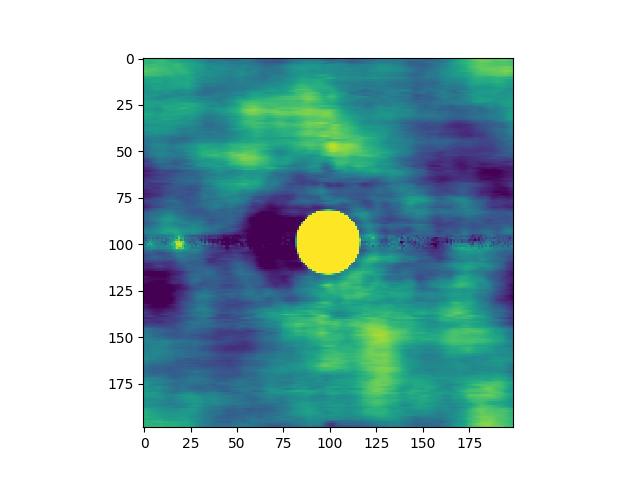

.......

In [29]:
%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib.animation as animation
fps = 30
nSeconds = 200//fps
fig = plt.figure()
a = phi[0,:,:]
im = plt.imshow(a, interpolation='none')
def animate(i):
    if i % fps == 0:
        print( '.', end ='' )
    im.set_array(phi[i,:,:])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )
anim.save('test_anim.mp4', fps=fps)

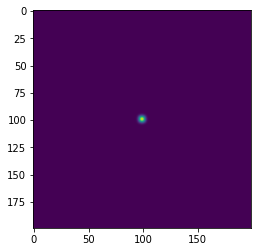

In [15]:
plt.imshow(phi[5,:,:])